# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import skimage.io
import matplotlib.image
from PIL import Image
import pickle

Num GPUs Available:  1


In [10]:
data1= pd.read_pickle("data1.pickle")
x_train= data1["x_train"]
y_train= data1["y_train"]
x_valid= data1["x_validation"]
y_valid= data1["y_validation"]
x_test= data1["x_test"]
y_test= data1["y_test"]

labels= pd.read_pickle("labels.pickle")

### Preparing some functions for later usage

In [11]:
# This function locates the arrays of the sign that needs to to be replaced and then itirates through them and replaces with the new 
# version directly taken from the image generator feed
def Sign_Fixer(x_data, y_data, Sign_name):
    indx= np.where(y_data==labels.index(Sign_name))[0]
    for i in indx:
        x= img_iter.next()
        #x= x.astype(np.uint8)
        x_data[i]= x
    return x_data

# This function Fixes an axis mismatch; the raw data is originally saved in the format (3, 32, 32)
def Axis_Fix(data):
    data= data.swapaxes(1, 2)
    data= data.swapaxes(2, 3)
    return data

In [12]:
# Fixing the axis
x_train= Axis_Fix(x_train)
x_valid= Axis_Fix(x_valid)
x_test= Axis_Fix(x_test)

# Data Processing

The cellule below will be used for 6 signs in the same format. The signs include: Stop, Roundabout mandatory, Children crossing, Bumpy road, No stopping, Right only.

In [13]:
# Name of the Sign folder; it should contain two folder: original (contaning the new images taken from Tunisian streets) and 
# processed (The images from the original folder will be saved here in the format 32x32)
ch= "TN_STOP_Sign"
images= os.listdir(ch+'/original')
k=0
# An array that contains the new images taken from Tunisan streets
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    # Resizing the image
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

# The Data generator that will generate augmented data using the 'processed' array as its base for the generation process
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

# Applying the modifications in the original data arrays
x_train= Sign_Fixer(x_train, y_train, 'Stop')
x_valid= Sign_Fixer(x_valid, y_valid, 'Stop')
x_test= Sign_Fixer(x_test, y_test, 'Stop')

In [14]:
ch= "TN_Roundabout_Sign"
images= os.listdir(ch+'/original')
k=0
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

x_train= Sign_Fixer(x_train, y_train, 'Roundabout mandatory')
x_valid= Sign_Fixer(x_valid, y_valid, 'Roundabout mandatory')
x_test= Sign_Fixer(x_test, y_test, 'Roundabout mandatory')

In [15]:
ch= "TN_Children_Crossing_Sign"
images= os.listdir(ch+'/original')
k=0
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

x_train= Sign_Fixer(x_train, y_train, 'Children crossing')
x_valid= Sign_Fixer(x_valid, y_valid, 'Children crossing')
x_test= Sign_Fixer(x_test, y_test, 'Children crossing')

In [16]:
ch= "TN_Speed_Bump_Sign"
images= os.listdir(ch+'/original')
k=0
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

x_train= Sign_Fixer(x_train, y_train, 'Bumpy road')
x_valid= Sign_Fixer(x_valid, y_valid, 'Bumpy road')
x_test= Sign_Fixer(x_test, y_test, 'Bumpy road')

In [17]:
labels[30]= "TN no stopping"
ch= "TN_No_Stopping_Sign"
images= os.listdir(ch+'/original')
k=0
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

x_train= Sign_Fixer(x_train, y_train, 'TN no stopping')
x_valid= Sign_Fixer(x_valid, y_valid, 'TN no stopping')
x_test= Sign_Fixer(x_test, y_test, 'TN no stopping')

In [18]:
labels[31]= "TN right only"
ch= "TN_Right_Only_Sign"
images= os.listdir(ch+'/original')
k=0
processed= np.zeros((len(images), 32, 32, 3), dtype="uint8")
for im_name in images:
    im_path= ch+ '/original/'+ im_name
    img = matplotlib.image.imread(im_path)
    img= Image.fromarray(img)    
    img_small= img.resize((32,32), Image.ANTIALIAS)
    img_small= np.array(img_small)
    im= Image.fromarray(img_small)
    im.save(ch+ "/processed/{}.jpeg".format(k))   
    img_small= img_small.reshape(1, 32, 32, 3)
    processed[k]= img_small
    k+=1

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.15,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # Don't randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    #brightness_range= [0, 1]
)  

img_iter = datagen.flow(processed/255, batch_size=1)

x_train= Sign_Fixer(x_train, y_train, 'TN right only')
x_valid= Sign_Fixer(x_valid, y_valid, 'TN right only')
x_test= Sign_Fixer(x_test, y_test, 'TN right only')

## Visualizing the modification:

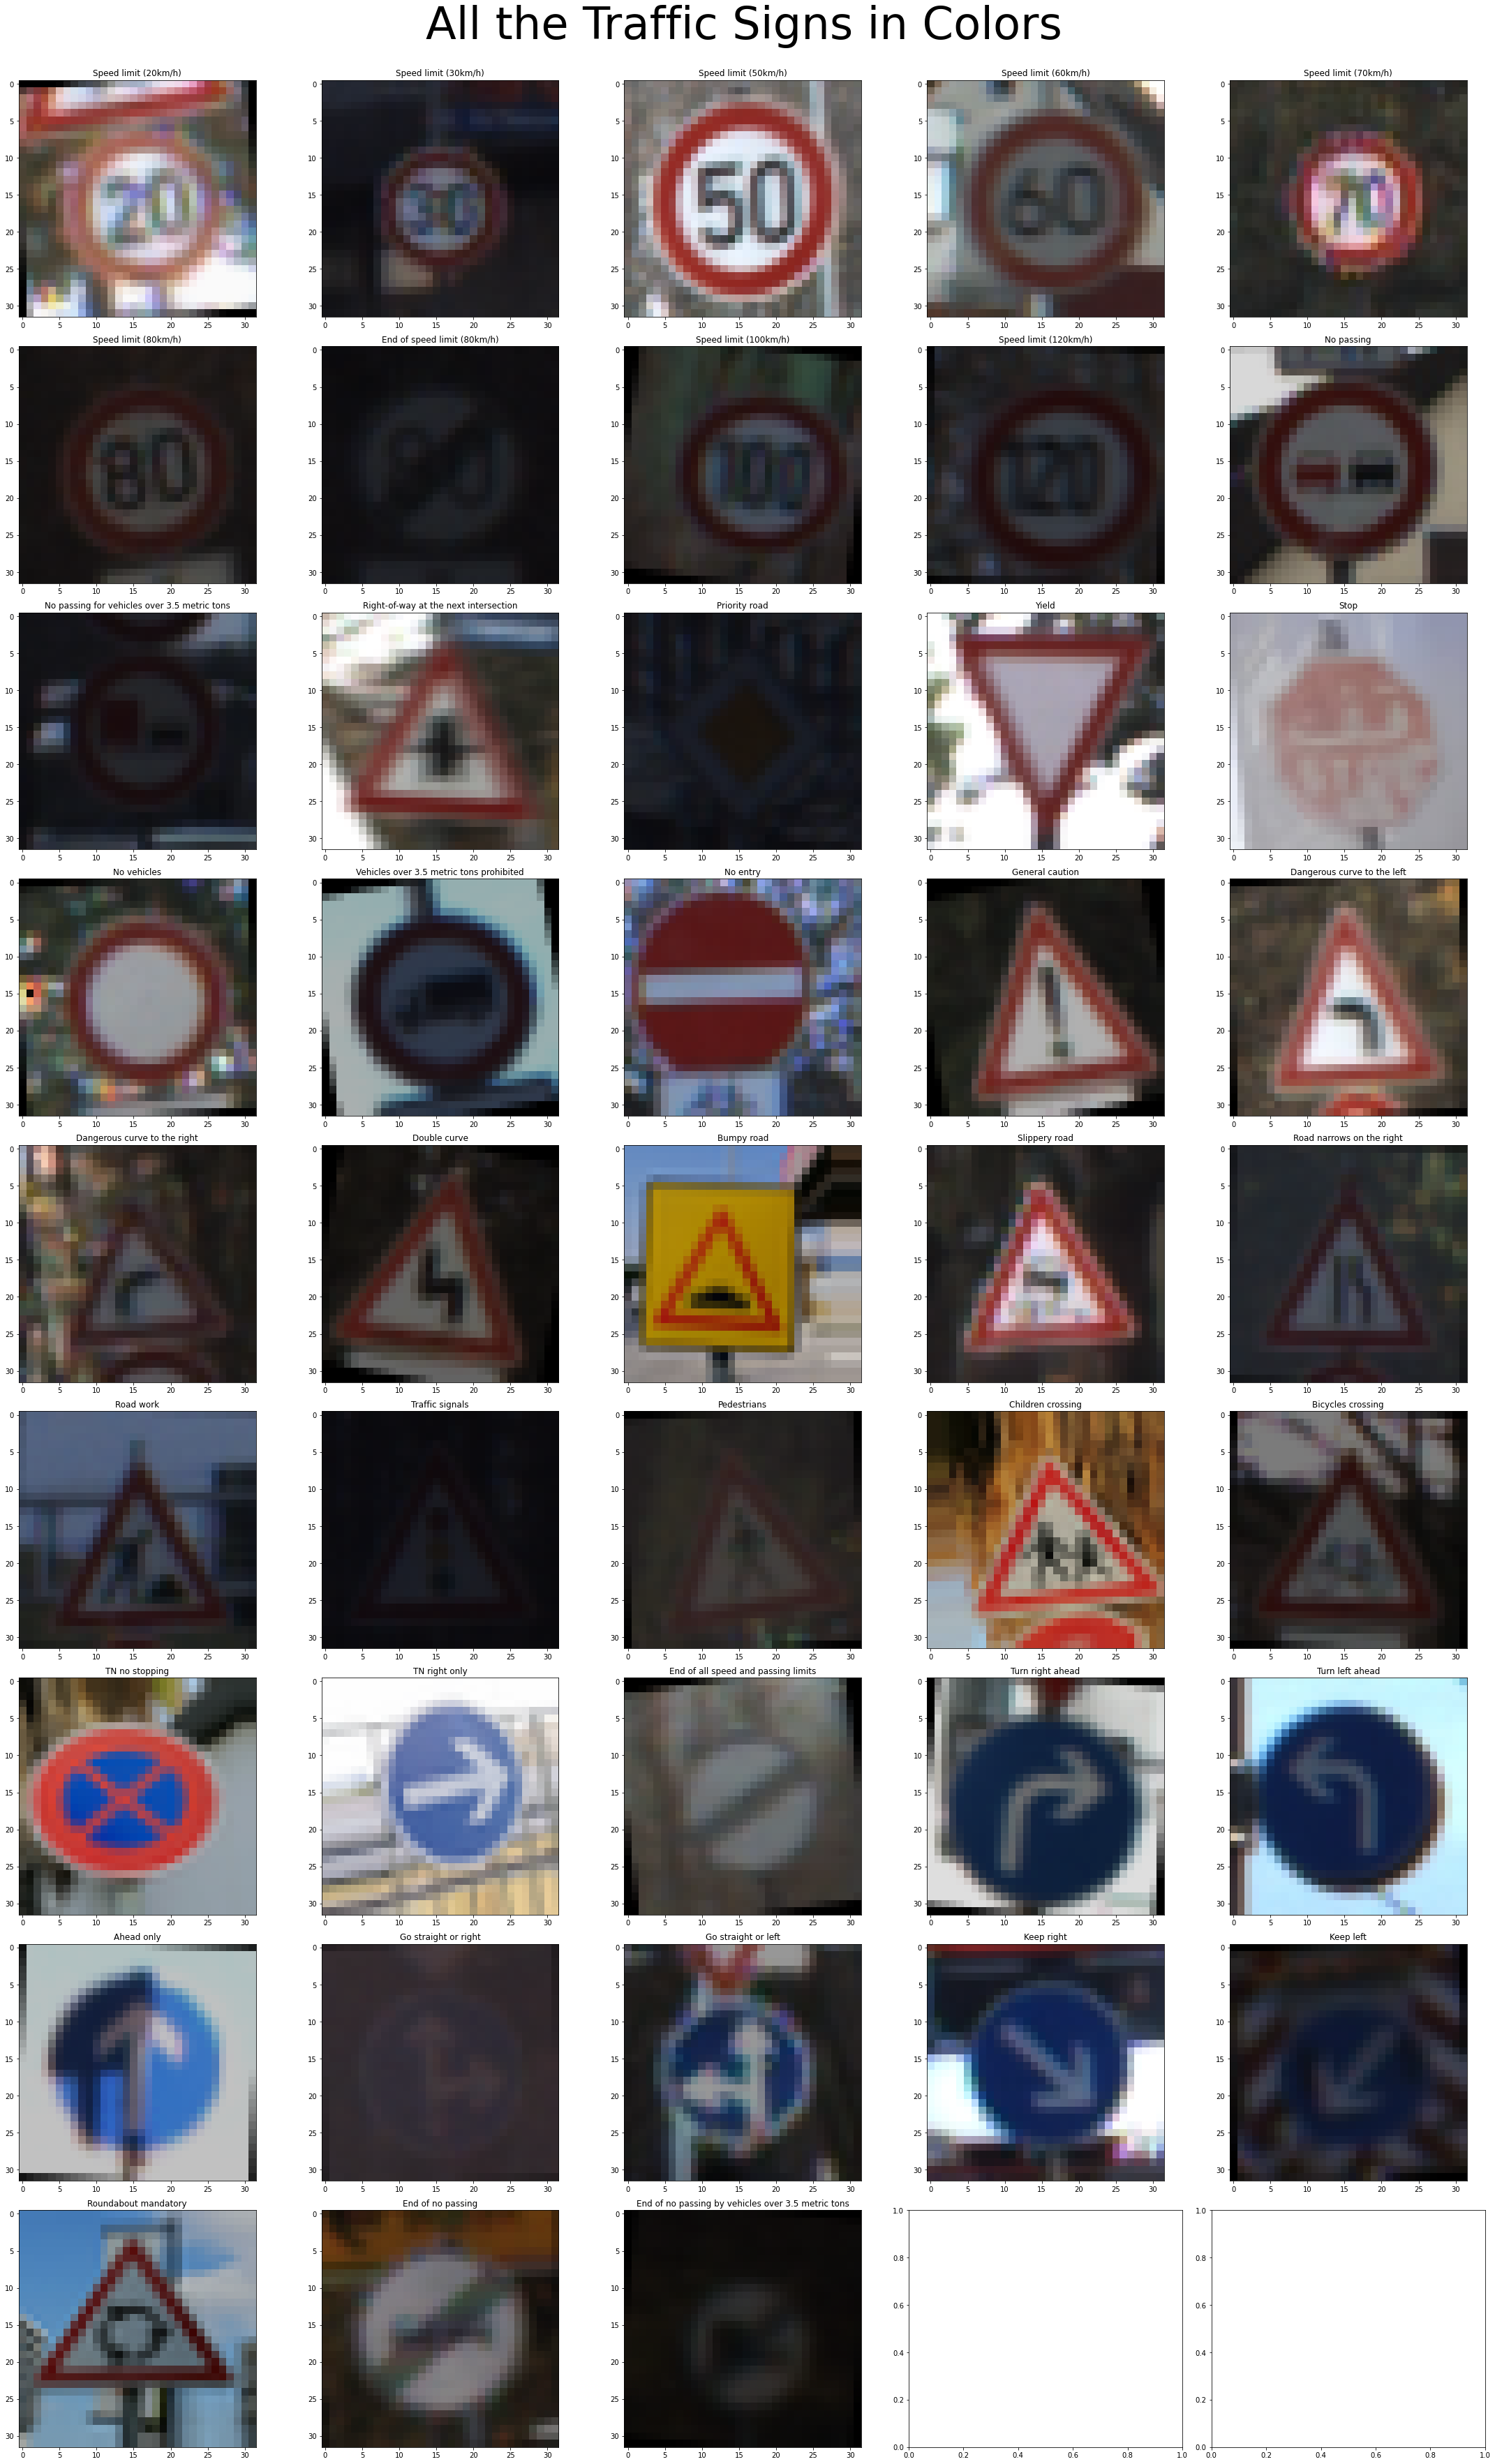

In [19]:
fig, ax = plt.subplots(9, 5, figsize=(30, 50))
w=0
p=0
for i in range(len(labels)):
    indxs= np.where(y_train==i)[0][88]
    img= x_train[indxs]
    #img= img.swapaxes(0, 2)
    #img= img.swapaxes(0, 1)
    ax[w][p].imshow(img)
    ax[w][p].set_title(labels[i])
    p+=1
    if p==5:
        p=0
        w+=1
fig.suptitle("All the Traffic Signs in Colors", fontsize=64)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [20]:
np.save("x_train_final_updated", x_train)
np.save("x_valid_final_updated", x_valid)
np.save("x_test_final_updated", x_test)

In [21]:
with open("updated_labels.pickle", 'wb') as f:
    pickle.dump(labels, f)